<a href="https://colab.research.google.com/github/Athrv10/TWITTER_sentimental_Anslysis_PRODIGY_DS_04/blob/main/Twitter_Tweets_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing Librabies**

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
import seaborn as sns

## **Loading Dataset**

In [ ]:
t_df = pd.read_csv('twitter_training.csv')

In [ ]:
t_df

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [ ]:
col_names = ['id','Region','target','text']

In [ ]:
t_df = pd.read_csv('twitter_training.csv',names=col_names)

In [ ]:
t_df

,id,Region,target,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [ ]:
t_df.shape

(74682, 4)

## **Performing EDA**

In [ ]:
t_df.isnull().sum()

,0
id,0
Region,0
target,0
text,686


In [ ]:
df =t_df.dropna()

In [ ]:
t_df.shape

(74682, 4)

In [ ]:
df.isnull().sum()

,0
id,0
Region,0
target,0
text,0


In [ ]:
df

,id,Region,target,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [ ]:
# locking for the distribution of the target variables
df['target'].value_counts()

,count
target,
Negative,22358
Positive,20655
Neutral,18108
Irrelevant,12875


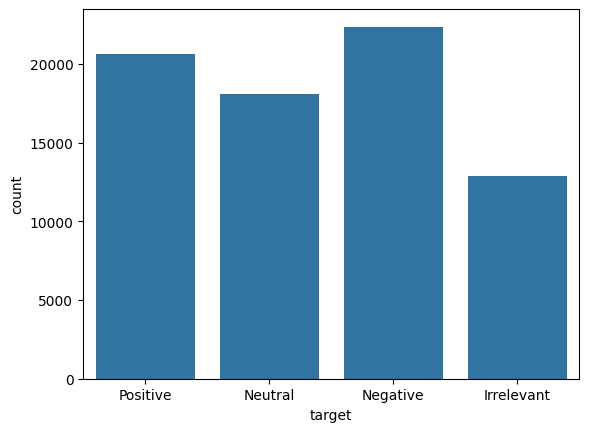

In [ ]:
sns.countplot(x=df['target'])
plt.show()

In [ ]:
df.Region.unique()

array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)', 'NBA2K', 'Dota2', 'PlayStation5(PS5)',
       'WorldOfCraft', 'CS-GO', 'Google', 'AssassinsCreed', 'ApexLegends',
       'LeagueOfLegends', 'Fortnite', 'Microsoft', 'Hearthstone',
       'Battlefield', 'PlayerUnknownsBattlegrounds(PUBG)', 'Verizon',
       'HomeDepot', 'FIFA', 'RedDeadRedemption(RDR)', 'CallOfDuty',
       'TomClancysRainbowSix', 'Facebook', 'GrandTheftAuto(GTA)',
       'MaddenNFL', 'johnson&johnson', 'Cyberpunk2077',
       'TomClancysGhostRecon', 'Nvidia'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['target'] = le.fit_transform(df['target'])

<ipython-input-92-23eedaa617a7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = le.fit_transform(df['target'])


In [ ]:
df['target'].value_counts()

,count
target,
1,22358
3,20655
2,18108
0,12875


1 =Negetive

2 = Neutral

3 = Positive

0 = Irrelevent

## **DATA PREPROCESSING AND PREPARING**

## **Stemming**:

          process of reducing the word into its root word usind the nltk.stem_porter

# **STOPWORDS**:

      the wordsthat are not relevent for the analysis

In [ ]:
nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


the above words are irrelevent for the analysis or prediction

In [ ]:
#converting the words except the stopwords into the rootwords
port_stem = PorterStemmer()

In [ ]:
def stemming(content):
  st_cont = re.sub('[^a-zA-Z]',' ',content)
  st_cont = st_cont.lower()
  st_cont = st_cont.split()
  st_cont = [port_stem.stem(word) for word in st_cont if not word in stopwords.words('english')]
  st_cont = ' '.join(st_cont)
  return st_cont

In [ ]:
#creating a new column for the using words of text

df['st_cont'] = df['text'].apply(stemming)

<ipython-input-100-de493b499d0d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['st_cont'] = df['text'].apply(stemming)


In [ ]:
df

,id,Region,target,text,st_cont
0,2401,Borderlands,3,im getting on borderlands and i will murder yo...,im get borderland murder
1,2401,Borderlands,3,I am coming to the borders and I will kill you...,come border kill
2,2401,Borderlands,3,im getting on borderlands and i will kill you ...,im get borderland kill
3,2401,Borderlands,3,im coming on borderlands and i will murder you...,im come borderland murder
4,2401,Borderlands,3,im getting on borderlands 2 and i will murder ...,im get borderland murder
...,...,...,...,...,...
74677,9200,Nvidia,3,Just realized that the Windows partition of my...,realiz window partit mac like year behind nvid...
74678,9200,Nvidia,3,Just realized that my Mac window partition is ...,realiz mac window partit year behind nvidia dr...
74679,9200,Nvidia,3,Just realized the windows partition of my Mac ...,realiz window partit mac year behind nvidia dr...
74680,9200,Nvidia,3,Just realized between the windows partition of...,realiz window partit mac like year behind nvid...


In [ ]:
X = df['st_cont'].values
y = df['target'].values

## **Spliting the dataset**

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=2)


**Using the TFID for converting the textual data to numerical data**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vector = TfidfVectorizer()
X_train=vector.fit_transform(X_train)
X_test=vector.transform(X_test)

## **MOdel Training and Evaluation**

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
prediction_train = model.predict(X_train)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,prediction_train)

0.8336543009662815

In [ ]:
prediction_test = model.predict(X_test)

In [ ]:
accuracy_score(y_test,prediction_test)

0.7799324324324325

In [ ]:
X_new = X_test[2000]
print(y_test[2000])

predict_new = model.predict(X_new)
print(predict_new)

1
[1]


In [ ]:

from sklearn.tree import DecisionTreeClassifier
dmodel = DecisionTreeClassifier()
dmodel.fit(X_train, y_train)

# Make predictions on the training and testing sets
prediction_train = dmodel.predict(X_train)
prediction_test = dmodel.predict(X_test)

# Evaluate the model's accuracy
print("Training Accuracy:", accuracy_score(y_train, prediction_train))
print("Testing Accuracy:", accuracy_score(y_test, prediction_test))


Training Accuracy: 0.973173863098858
Testing Accuracy: 0.8091216216216216


In [ ]:

# Predict for a new input
X_new = X_test[200]
predict_new = dmodel.predict(X_new)
print("Actual Value:", y_test[200])
print("Predicted Value:", predict_new)

Actual Value: 3
Predicted Value: [3]
